In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("anonymized_data.csv")

In [3]:
data.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
EJWY     500 non-null float64
VALM     500 non-null float64
EGXO     500 non-null float64
HTGR     500 non-null float64
SKRF     500 non-null float64
NNSZ     500 non-null float64
NYLC     500 non-null float64
GWID     500 non-null float64
TVUT     500 non-null float64
CJHI     500 non-null float64
NVFW     500 non-null float64
VLBG     500 non-null float64
IDIX     500 non-null float64
UVHN     500 non-null float64
IWOT     500 non-null float64
LEMB     500 non-null float64
QMYY     500 non-null float64
XDGR     500 non-null float64
ODZS     500 non-null float64
LNJS     500 non-null float64
WDRT     500 non-null float64
LKKS     500 non-null float64
UOBF     500 non-null float64
VBHE     500 non-null float64
FRWU     500 non-null float64
NDYZ     500 non-null float64
QSBO     500 non-null float64
JDUB     500 non-null float64
TEVK     500 non-null float64
EZTM     500 non-null flo

In [10]:
from sklearn.preprocessing import MinMaxScaler


In [13]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data.drop('Label',axis=1))

In [16]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [17]:
num_inputs = 30# FILL ME IN
num_hidden = 2# FILL ME IN 
num_outputs = num_inputs # Must be true for an autoencoder!

learning_rate =0.01 #FILL ME IN

In [18]:
X=tf.placeholder(tf.float32,shape=[None,num_inputs])

In [20]:
hidden=fully_connected(X,num_hidden,activation_fn=None)
output=fully_connected(hidden,num_outputs,activation_fn=None)

In [22]:
loss=tf.reduce_mean(tf.square(output-X))

In [23]:
optimizer=tf.train.AdamOptimizer(learning_rate)
train=optimizer.minimize(loss)

In [24]:
init=tf.global_variables_initializer()

In [25]:
num_steps=1000

with tf.Session() as sess:
    sess.run(init)
    for iterator in range(num_steps):
        sess.run(train,feed_dict={X:scaled_data})

In [26]:
with tf.Session() as sess:
    sess.run(init)
    output_2d=hidden.eval(feed_dict={X:scaled_data})

In [27]:
output_2d.shape

(500, 2)

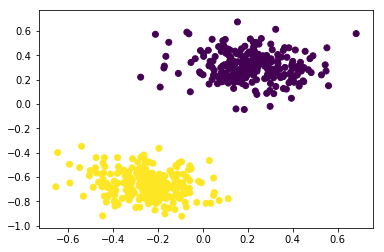

In [30]:
plt.scatter(output_2d[:,0],output_2d[:,1],c=data['Label'])